In [4]:
#define the default font sizes to plot the figure
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
#Make this notebook's output stable across runs:
import numpy as np

np.random.seed(42)

In [6]:
## Common imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# read the data
cc_data = pd.read_csv('creditcard_2023.csv', on_bad_lines='skip')

In [5]:
#show the top 5 rows, there are 31 attributes
cc_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
# get a discription of the data, the total number of rows (entries) are 568630, total 31 columns(attributes), each attribute's type
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

/var/folders/j4/mhnzkqbs71s_tglmmhl9w0tw0000gq/T/ipykernel_3359/674272222.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


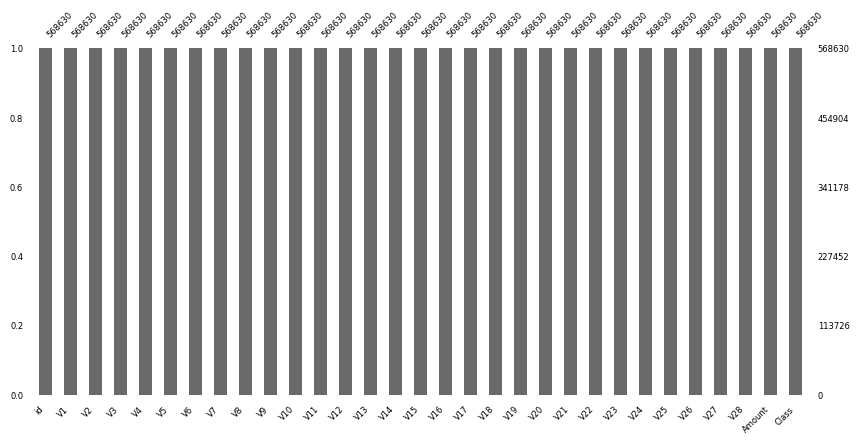

In [7]:
#DEA 
import missingno as mso # missging values visualization
# Checking missing values
fig,ax = plt.subplots(figsize = (10,4.5))
mso.bar(cc_data, fontsize = 6, ax = ax)
fig.show()

In [8]:
#drop the id column
cc_data.drop("id", axis = 1, inplace = True)

In [9]:
#using the float datatype of columns to create a list, there are 29 columns with float datatype
cols = cc_data.select_dtypes(include = ["float"]).columns.to_list()
print(f"Total columnas: {len(cols)}")
cols

Total columnas: 29


['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [10]:
# Describe by statistics.
cc_data[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062
V10,568630.0,1.991314e-16,1.000001,-3.163276,-0.590101,0.262614,0.592460,31.722709


/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

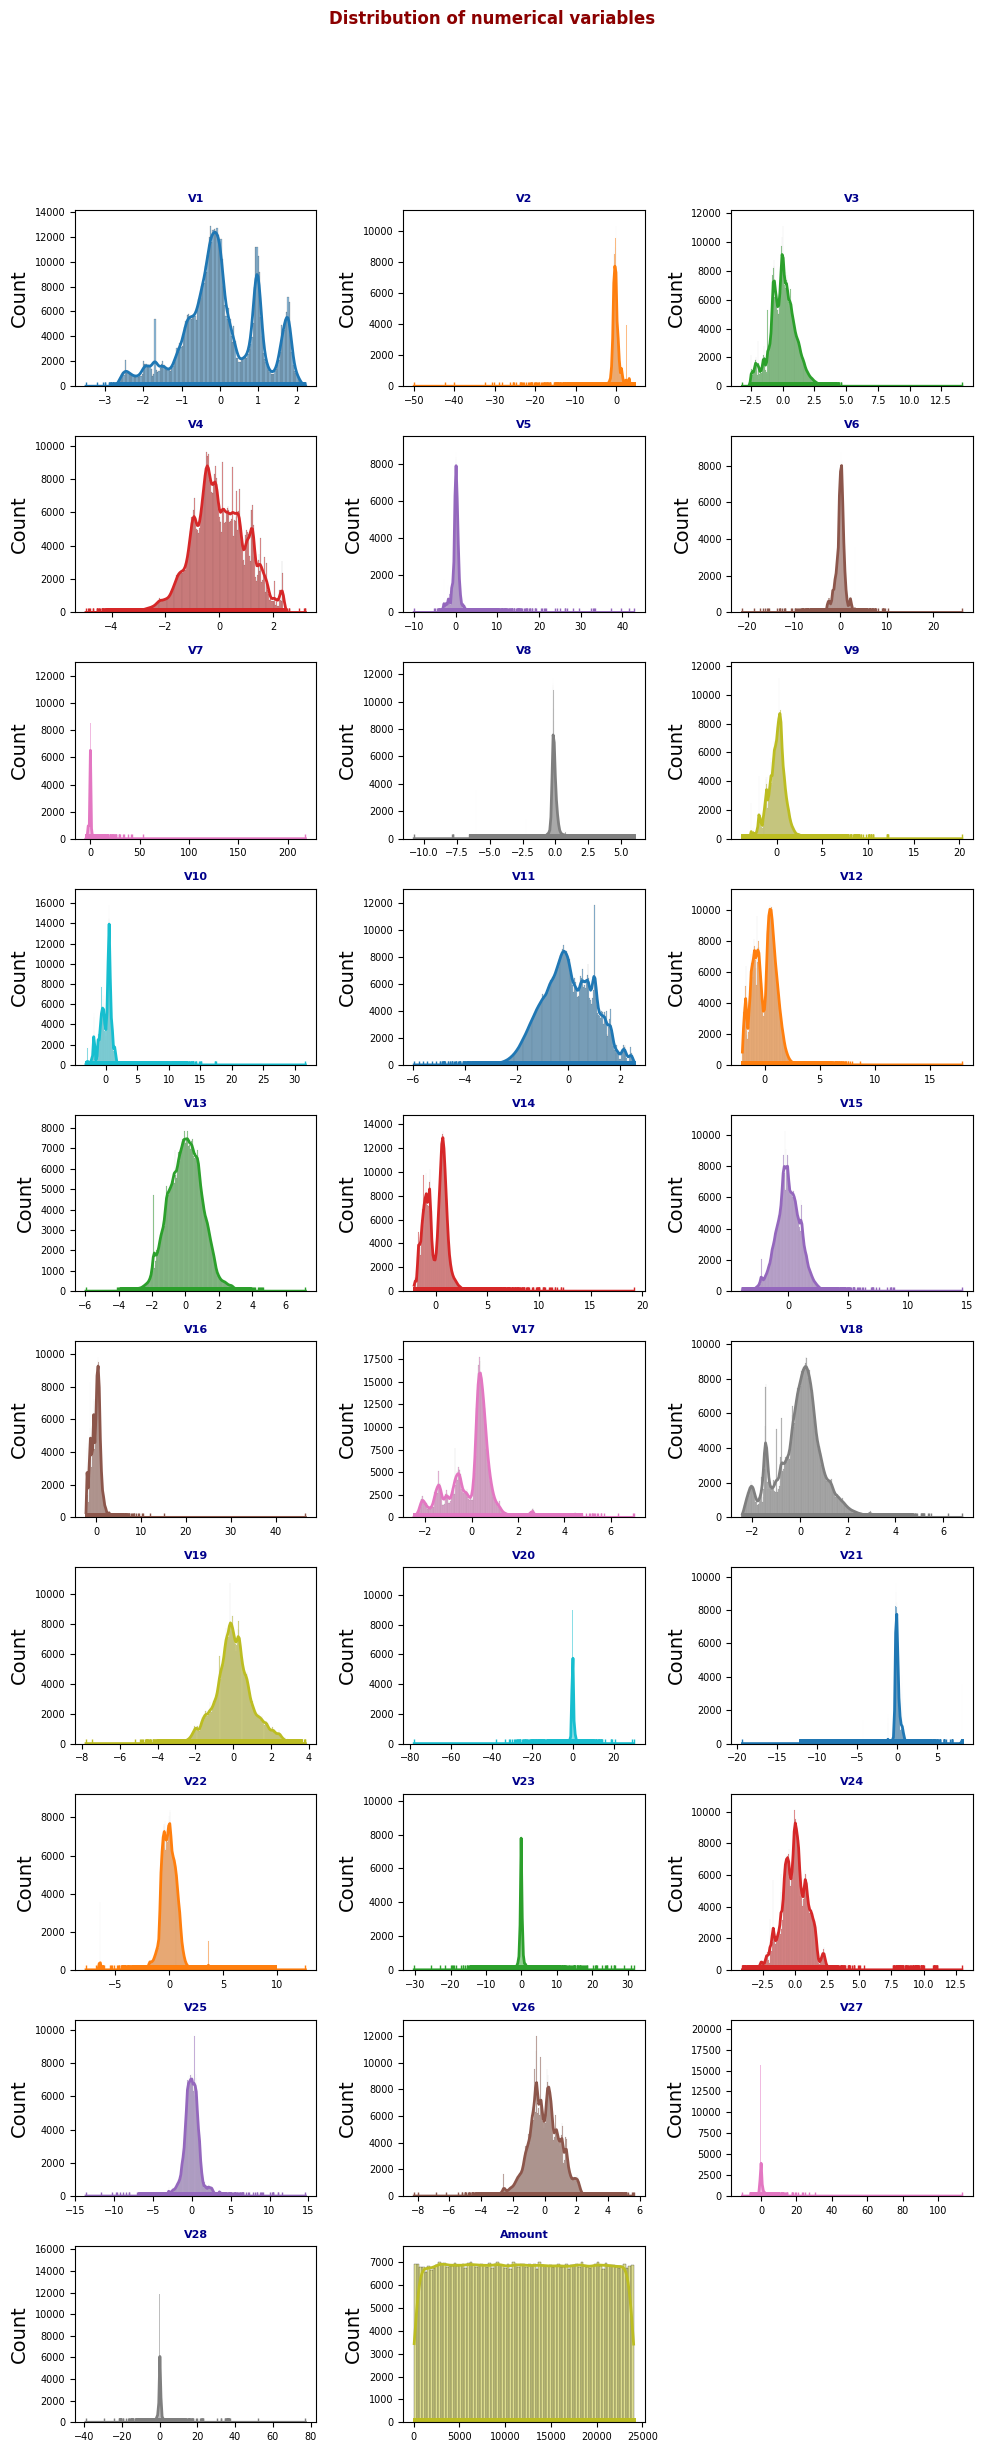

In [11]:
#Destribution of numeric values
import seaborn as sns
fig,axes = plt.subplots(nrows = 10, ncols = 3, figsize = (10, 25))
axes = axes.flat

for i,col in enumerate(cols):
    sns.histplot(
    cc_data, 
    x = col, 
    kde = True, 
    line_kws = {"linewidth":2.0}, 
    stat = "count", 
    color = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
    ax = axes[i]
    )
    
    sns.rugplot(
    cc_data, 
    x = col, 
    color = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
    ax = axes[i]
    )
    
    axes[i].set_xlabel("")
    axes[i].set_title(f"{col}", fontsize = 8, fontweight = "bold", color = "darkblue")
    axes[i].tick_params(labelsize = 7)
    
    
fig.delaxes(axes[29])
fig.suptitle("Distribution of numerical variables", fontsize = 12, fontweight = "bold", color = "darkred")
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()


In [13]:
# Check your skewness and kurtosis of each numerical variable.
for col in cols:
    print(f"{col}:")
    print(f"Skewness = {cc_data[col].skew()}")
    print(f"Kurtosis = {cc_data[col].kurt()}")
    print("=="*20)

V1:
Skewness = -0.08341717301015879
Kurtosis = -0.19551088568279074
V2:
Skewness = -1.397951923713946
Kurtosis = 54.50647846202814
V3:
Skewness = 0.014622213363246254
Kurtosis = 0.28868614603280385
V4:
Skewness = -0.04416892714770696
Kurtosis = -0.10335451793576445
V5:
Skewness = 1.5064136757634041
Kurtosis = 47.09935165702095
V6:
Skewness = -0.2016110101307477
Kurtosis = 4.4905101732511685
V7:
Skewness = 19.026866097533325
Kurtosis = 4017.608217329162
V8:
Skewness = 0.2999722258586845
Kurtosis = 18.939201932362025
V9:
Skewness = 0.17105746155506976
Kurtosis = 3.6393235693250436
V10:
Skewness = 0.7404135529207346
Kurtosis = 13.164784821929029
V11:
Skewness = -0.02089056131978458
Kurtosis = -0.3749301739295974
V12:
Skewness = 0.06675895200237957
Kurtosis = -0.21380828444874433
V13:
Skewness = 0.014906385371884177
Kurtosis = -0.007776940607126193
V14:
Skewness = 0.2078348004501865
Kurtosis = 0.8994629656844437
V15:
Skewness = 0.0112329832827567
Kurtosis = 0.40217237781525084
V16:
Skewnes

/var/folders/j4/mhnzkqbs71s_tglmmhl9w0tw0000gq/T/ipykernel_84118/3471916226.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as

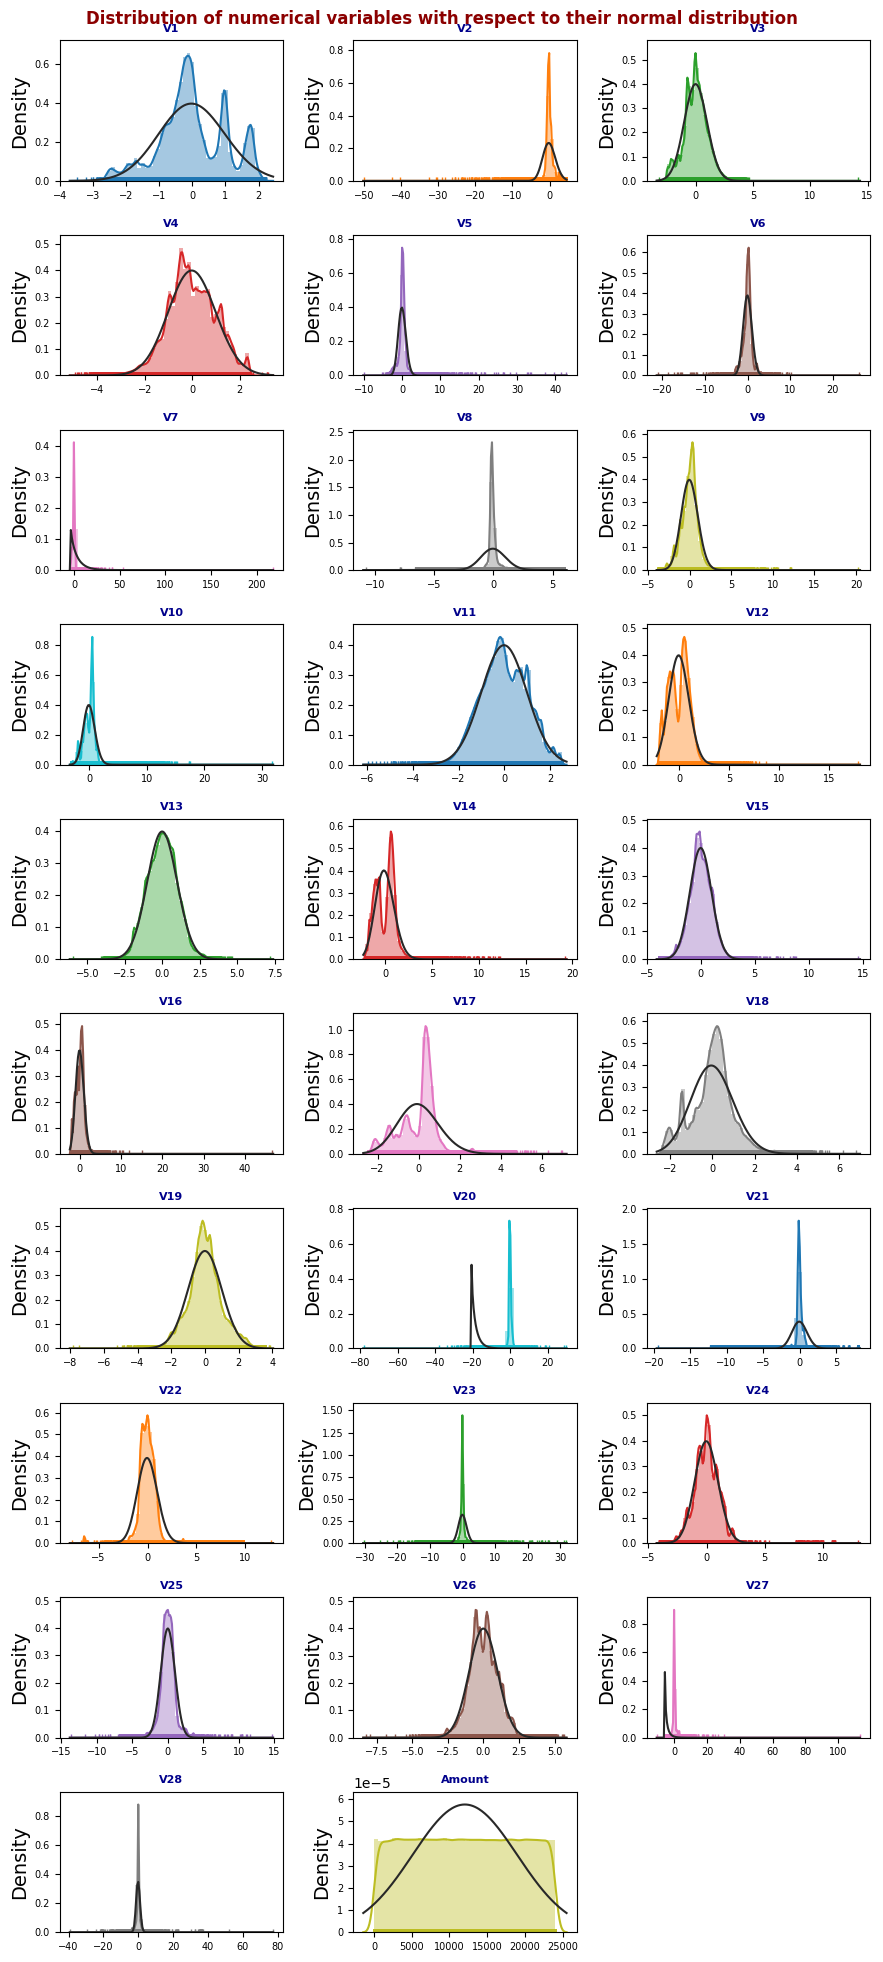

In [14]:
#present the data in distribution of numerical variables with respect to normal distribution
from scipy import stats

fig,axes = plt.subplots(nrows = 10, ncols = 3, figsize = (9, 20))
axes = axes.flat

for i,col in enumerate(cols):
    sns.distplot(
    cc_data[col],
    rug = True, 
    fit = stats.gamma, 
    color = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
    ax = axes[i]
    )
    
    axes[i].set_xlabel("")
    axes[i].set_title(f"{col}", fontsize = 8, fontweight = "bold", color = "darkblue")
    axes[i].tick_params(labelsize = 7)
    
    
fig.delaxes(axes[29])
fig.suptitle("Distribution of numerical variables with respect to their normal distribution", fontsize = 12, fontweight = "bold", color = "darkred")
fig.tight_layout()
fig.show()

In [12]:
# check with a 95% confidence level if the variables come from a normal distribution.
# use shapiro test.
from scipy.stats import norm
from scipy.stats import shapiro

for col in cols:
  p_value = shapiro(cc_data[col])[1]
  result = 'No Normal Distribution' if p_value < 0.05 else 'Normal Distribution'
  print(f'* {col}: p-value = {p_value} => {result}')

/Users/gong/my_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* V1: p-value = 0.0 => No Normal Distribution
* V2: p-value = 0.0 => No Normal Distribution
* V3: p-value = 0.0 => No Normal Distribution
* V4: p-value = 0.0 => No Normal Distribution
* V5: p-value = 0.0 => No Normal Distribution
* V6: p-value = 0.0 => No Normal Distribution
* V7: p-value = 0.0 => No Normal Distribution
* V8: p-value = 0.0 => No Normal Distribution
* V9: p-value = 0.0 => No Normal Distribution
* V10: p-value = 0.0 => No Normal Distribution
* V11: p-value = 0.0 => No Normal Distribution
* V12: p-value = 0.0 => No Normal Distribution
* V13: p-value = 1.929747739390119e-28 => No Normal Distribution
* V14: p-value = 0.0 => No Normal Distribution
* V15: p-value = 0.0 => No Normal Distribution
* V16: p-value = 0.0 => No Normal Distribution
* V17: p-value = 0.0 => No Normal Distribution
* V18: p-value = 0.0 => No Normal Distribution
* V19: p-value = 0.0 => No Normal Distribution
* V20: p-value = 0.0 => No Normal Distribution
* V21: p-value = 0.0 => No Normal Distribution
* V2

/Users/gong/my_env/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/var/folders/j4/mhnzkqbs71s_tglmmhl9w0tw0000gq/T/ipykernel_84118/4028013626.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


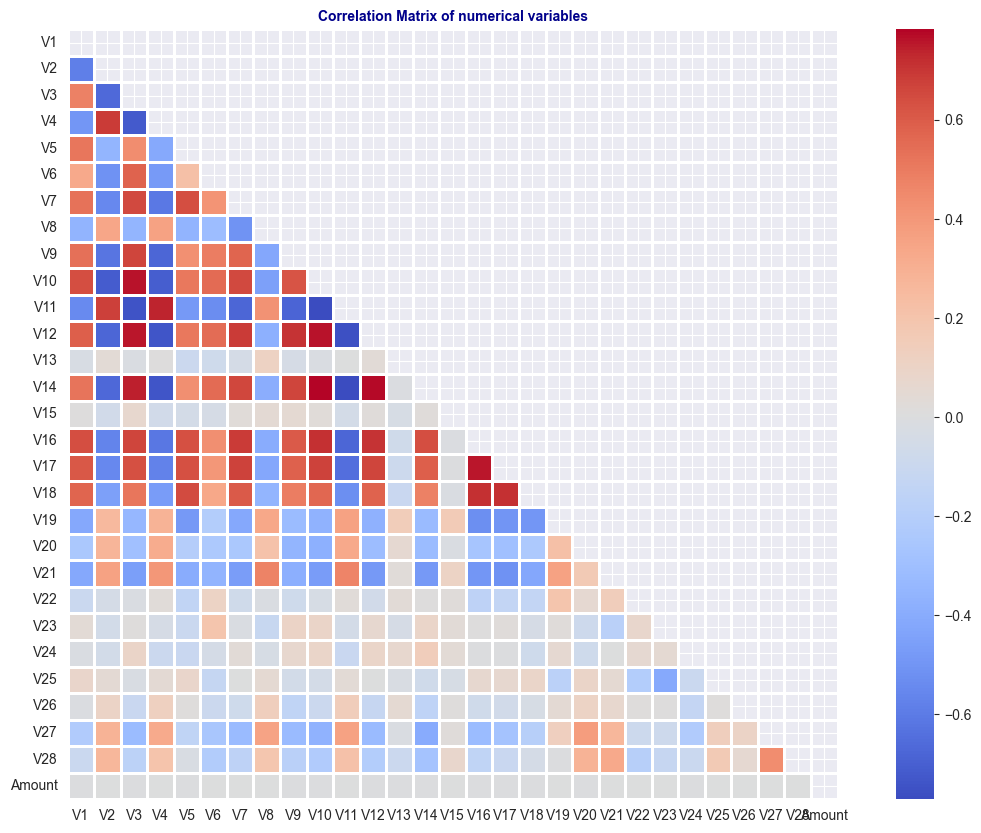

In [16]:
# generate a correlation matrix between each pair of variables
# use the Spearman correlation since the variables do not come from a normal distribution.

sns.set_style("darkgrid")
corr_matrix = cc_data[cols].corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (15,10))

sns.heatmap(corr_matrix,
            cmap = "coolwarm",
            annot = True,
            annot_kws = {"fontsize":6, "fontweight":"bold"},
            square = True,
            mask = mask,
            linewidths = 1.0,
            linecolor = "white",
            ax = ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_title('Correlation Matrix of numerical variables', fontsize = 10, fontweight = 'bold', color = 'darkblue')
fig.show()

/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

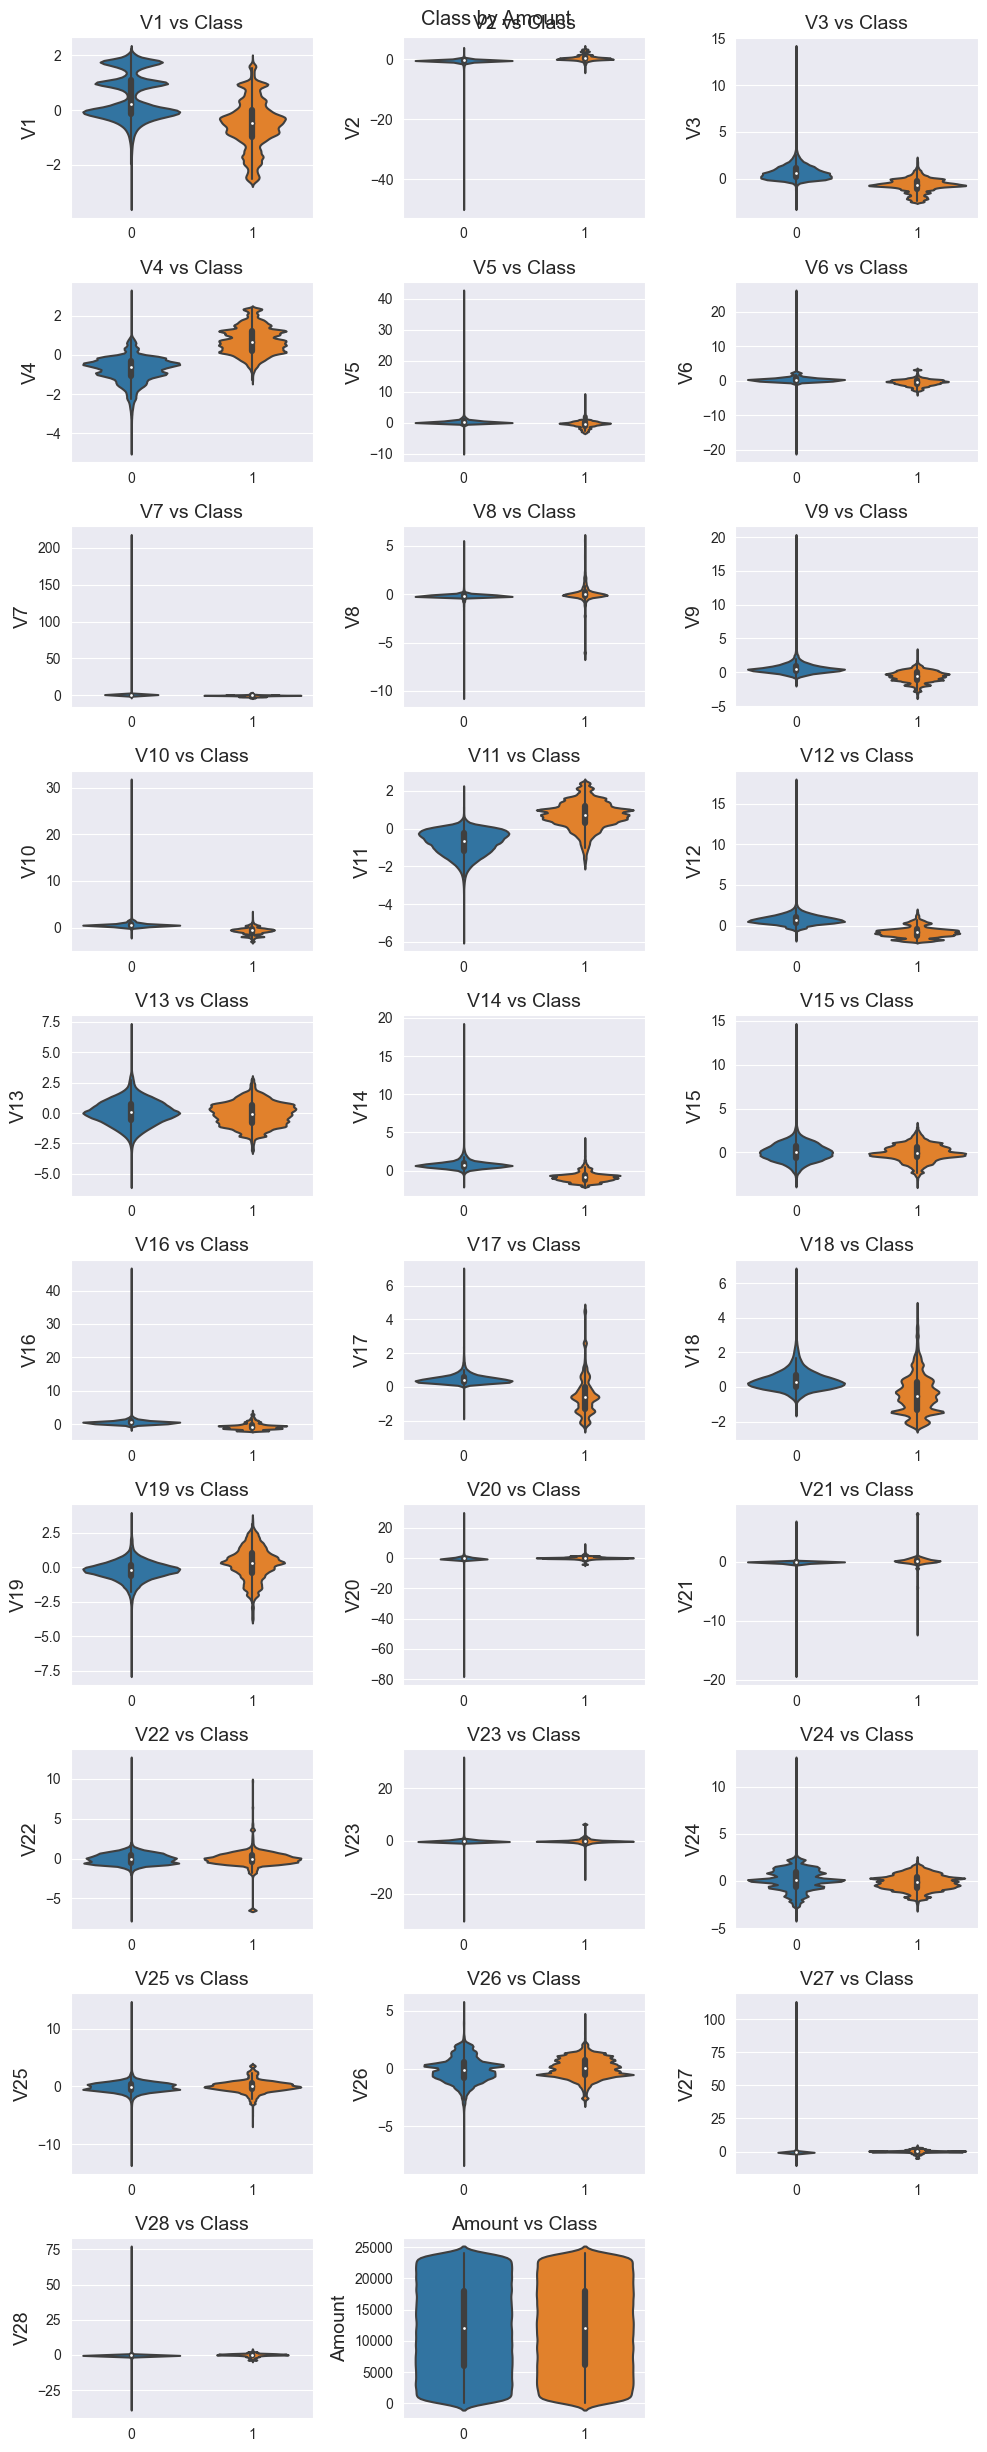

In [17]:
# generate a vilinplot for class vs col
sns.set_style("darkgrid")
fig,axes = plt.subplots(nrows = 10, ncols = 3, figsize = (10, 25))
axes = axes.flat

for i,col in enumerate(cols):
    sns.violinplot(cc_data, 
                  x = "Class", 
                  y = col, 
                  ax = axes[i])
    axes[i].set_xlabel("")
    axes[i].set_title(f"{col} vs Class")
    
fig.delaxes(axes[29])
fig.suptitle(f"Class by {col}")
fig.tight_layout()
fig.show()

/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gong/my_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/j4/mhnzkqbs71s_tglmmhl9w0tw0000gq/T/ipykernel_84118/1648558822.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


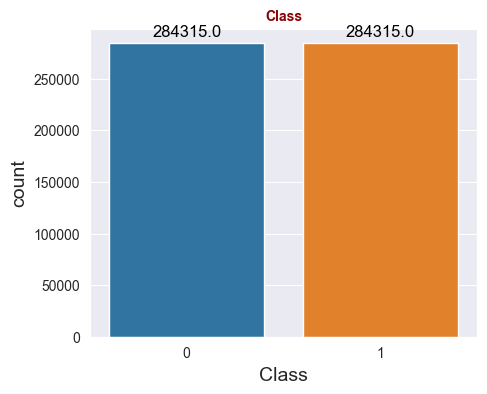

In [23]:
#generate a count plot to see class vs amount
from numerizer import numerize
fig,ax = plt.subplots(figsize = (5,4))
sns.countplot(cc_data, x = "Class", ax = ax)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize(str(height))}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Class", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

In [12]:
#Create a training set and test set
# divide into target(X) and predict(y)
X = cc_data.drop("Class", axis = 1)
y = cc_data["Class"]

# divide into training set and test set by using sklearn
# We define our random seed.
from sklearn.model_selection import train_test_split
SEED = 123
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                       test_size = 0.3, 
                                       random_state = SEED, 
                                       shuffle = True, 
                                       stratify = y)

print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")

X train: (398041, 29)
X test: (170589, 29)


In [13]:
# scale 'Amount' attribute
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
column = ["Amount"]

preprocessor = ColumnTransformer(transformers = [('scaler', StandardScaler(),column)], 
                                remainder = "passthrough", 
                                verbose_feature_names_out = False).set_output(transform = "pandas")
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

/var/folders/j4/mhnzkqbs71s_tglmmhl9w0tw0000gq/T/ipykernel_84118/1598994144.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


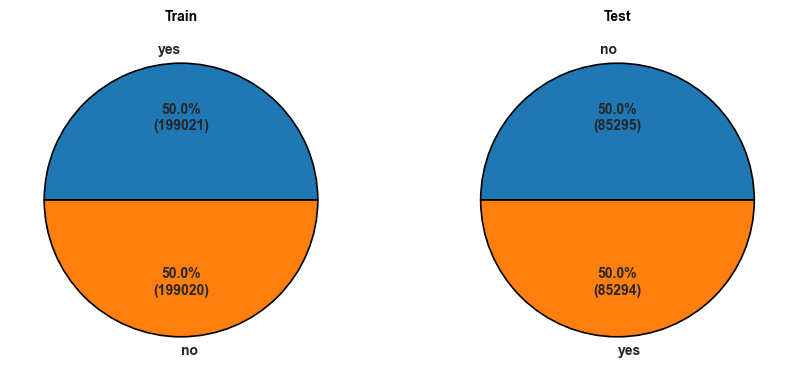

In [27]:
# Visualization of the objective variable in the training and test set.
cc_pct_train = y_train.value_counts().to_frame().rename(index = {0:'no',
                                                                 1:'yes'})
cc_pct_train = cc_pct_train.rename(columns = {'y':'count'})

labels_train = cc_pct_train.index.to_list()
values_train = cc_pct_train.iloc[:,0]

cc_pct_test = y_test.value_counts().to_frame().rename(index = {0:'no',
                                                               1:'yes'})
cc_pct_test = cc_pct_test.rename(columns = {'y':'count'})

labels_test = cc_pct_test.index.to_list()
values_test = cc_pct_test.iloc[:,0]


fig,axes = plt.subplots(1,2,figsize = (9,4))

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"


axes[0].pie(x = values_train, labels = labels_train, autopct = autopct_fun(values_train),
            wedgeprops = {'linewidth':1.2, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[0].set_title('Train', fontsize = 10, fontweight = 'bold', color = 'black')

axes[1].pie(x = values_test, labels = labels_test, autopct = autopct_fun(values_test),
            wedgeprops = {'linewidth':1.2, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[1].set_title('Test', fontsize = 10, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

In [14]:
#Training and Evaluating on the Training set

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# define the models: DecisionTree, Boosting, k-Nearest Neighbor, Support Vector Machines.

dt = DecisionTreeClassifier(criterion='entropy', max_depth=50)
dt.fit(X_train, y_train)
print('Dtree ', dt.score(X_test,y_test))

bt =  GradientBoostingClassifier()
bt.fit(X_train,y_train)
print('The Boosting: ',bt.score(X_test,y_test))

knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
print('The KNN ',knn.score(X_test,y_test))

svms = SVC()
svms.fit(X_train,y_train)
print('The SVMs ',svms.score(X_test,y_test))


Dtree  0.997936560974037
The Boosting:  0.9795649191917416
The KNN  0.9272227400359929


Epoch 1/50
21324/21324 [==============================] - 14s 635us/step - loss: 0.6937 - accuracy: 0.4994
Epoch 2/50
21324/21324 [==============================] - 14s 635us/step - loss: 0.6935 - accuracy: 0.5005
Epoch 3/50
21324/21324 [==============================] - 14s 652us/step - loss: 0.6935 - accuracy: 0.5002
Epoch 4/50
21324/21324 [==============================] - 14s 655us/step - loss: 0.6934 - accuracy: 0.4996
Epoch 5/50
21324/21324 [==============================] - 14s 651us/step - loss: 0.6932 - accuracy: 0.5005
Epoch 6/50
21324/21324 [==============================] - 14s 644us/step - loss: 0.6932 - accuracy: 0.5005
Epoch 7/50
21324/21324 [==============================] - 14s 637us/step - loss: 0.6932 - accuracy: 0.4997
Epoch 8/50
21324/21324 [==============================] - 14s 638us/step - loss: 0.6932 - accuracy: 0.5002
Epoch 9/50
21324/21324 [==============================] - 14s 637us/step - loss: 0.6932 - accuracy: 0.5005
Epoch 10/50
21324/21324 [============

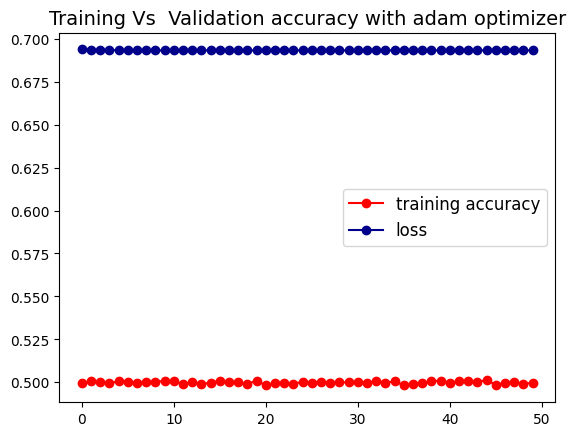

NameError: name 'x' is not defined

In [18]:
# define the ANN-Neural Networks 
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses
import pandas as pd


Y=pd.get_dummies(y)
x_tran,x_tst,y_tran,y_tst=train_test_split(X,Y)
ann=Sequential()
ann.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.relu))
ann.add(Dense(units=X.shape[1],activation=keras.activations.relu))
ann.add(Dense(units=X.shape[1],activation=keras.activations.tanh))
ann.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
ann.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
ann.add(Dense(units=Y.shape[1],activation=keras.activations.sigmoid))
ann.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics='accuracy')
hist=ann.fit(x_tran,y_tran,batch_size=20,epochs=50)
plt.plot(hist.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(hist.history['loss'], label='loss', marker='o', color='darkblue')
plt.title('Training Vs  Validation accuracy with adam optimizer')
plt.legend()
plt.show()




Epoch 1/50
21324/21324 [==============================] - 8s 383us/step - loss: 0.3582 - accuracy: 0.8487
Epoch 2/50
21324/21324 [==============================] - 8s 382us/step - loss: 0.2425 - accuracy: 0.9143
Epoch 3/50
21324/21324 [==============================] - 8s 382us/step - loss: 0.2103 - accuracy: 0.9277
Epoch 4/50
21324/21324 [==============================] - 8s 385us/step - loss: 0.1976 - accuracy: 0.9328
Epoch 5/50
21324/21324 [==============================] - 8s 382us/step - loss: 0.1855 - accuracy: 0.9382
Epoch 6/50
21324/21324 [==============================] - 8s 383us/step - loss: 0.1791 - accuracy: 0.9415
Epoch 7/50
21324/21324 [==============================] - 8s 380us/step - loss: 0.1742 - accuracy: 0.9436
Epoch 8/50
21324/21324 [==============================] - 8s 379us/step - loss: 0.1708 - accuracy: 0.9451
Epoch 9/50
21324/21324 [==============================] - 8s 394us/step - loss: 0.1677 - accuracy: 0.9463
Epoch 10/50
21324/21324 [=====================

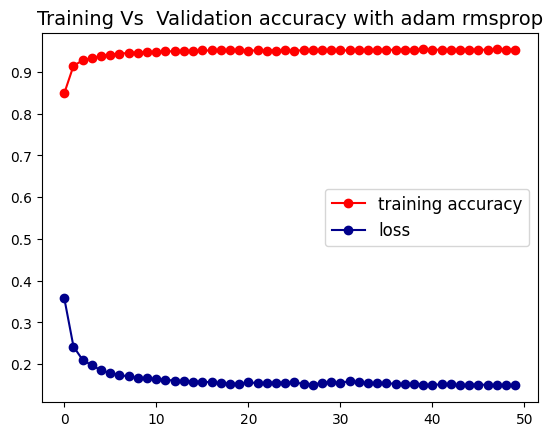

In [19]:
ann1=Sequential()
ann1.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.sigmoid))
ann1.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
ann1.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
ann1.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
ann1.add(Dense(units=Y.shape[1],activation=keras.activations.sigmoid))
ann1.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics='accuracy')
hist1=ann1.fit(x_tran,y_tran,batch_size=20,epochs=50)

plt.plot(hist1.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(hist1.history['loss'], label='loss', marker='o', color='darkblue')
plt.title('Training Vs  Validation accuracy with adam rmsprop')
plt.legend()
plt.show()